In [2]:
# for loading/processing the images
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

# models
from keras.applications.vgg16 import VGG16
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [3]:
path = r"/content/drive/MyDrive/dataset"

# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
images = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the images list
            images.append(file.name)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
print(images[:-1])

['subject02_7.jpg', 'subject01_7.jpg', 'subject01_2.jpg', 'subject04_3.jpg', 'subject03_2.jpg', 'subject05_1.jpg', 'subject02_10.jpg', 'subject05_3.jpg', 'subject03_4.jpg', 'subject04_5.jpg', 'subject01_1.jpg', 'subject03_1.jpg', 'subject02_5.jpg', 'subject03_5.jpg', 'subject04_1.jpg', 'subject04_8.jpg', 'subject04_4.jpg', 'subject02_1.jpg', 'subject04_7.jpg', 'subject02_4.jpg', 'subject02_6.jpg', 'subject02_8.jpg', 'subject02_9.jpg', 'subject01_6.jpg', 'subject03_3.jpg', 'subject01.jpg', 'subject02.jpg', 'subject04.jpg', 'subject02_2.jpg', 'subject03_10.jpg', 'subject05_2.jpg', 'subject01_3.jpg', 'subject01_4.jpg', 'subject03_9.jpg', 'subject03_6.jpg', 'subject04_6.jpg', 'subject01_5.jpg', 'subject04_9.jpg', 'subject02_3.jpg', 'subject03_8.jpg', 'subject05.jpg', 'subject04_10.jpg', 'subject03_7.jpg', 'subject03.jpg', 'subject01_8.jpg', 'subject04_2.jpg', 'subject01_9.jpg', 'subject11_1.jpg', 'subject13_6.jpg', 'subject10_1.jpg', 'subject14_7.jpg', 'subject08_7.jpg', 'subject05_4.jpg',

In [5]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx)
    return features

553467096/553467096 [==============================] - 5s 0us/step


In [7]:
data = {}
p = r"/content/drive/MyDrive/dataset.pkl"

# loop through each image in the dataset
for image in images:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(image,model)
        data[image] = feat
        print(image)
    # if something fails, save the extracted features as a pickle file (optional)
    except Exception as ex:
        with open(p,'wb') as file:
            pickle.dump(data,file)
            print(f"Exception: {ex}")

with open(p,'wb') as file:
    pickle.dump(data,file)
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat.shape
(210, 1, 4096)

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape
(210, 4096)

# get the unique labels (from the image_labels.csv)
# df = pd.read_csv('image_labels.csv')
# label = df['label'].tolist()
# unique_labels = list(set(label))

1/1 [==============================] - 1s 574ms/step
subject02_7.jpg
1/1 [==============================] - 1s 595ms/step
subject01_7.jpg
1/1 [==============================] - 1s 595ms/step
subject01_2.jpg
1/1 [==============================] - 1s 597ms/step
subject04_3.jpg
1/1 [==============================] - 1s 807ms/step
subject03_2.jpg
1/1 [==============================] - 1s 997ms/step
subject05_1.jpg
1/1 [==============================] - 1s 1s/step
subject02_10.jpg
1/1 [==============================] - 1s 1s/step
subject05_3.jpg
1/1 [==============================] - 1s 1s/step
subject03_4.jpg
1/1 [==============================] - 1s 974ms/step
subject04_5.jpg
1/1 [==============================] - 1s 974ms/step
subject01_1.jpg
1/1 [==============================] - 1s 710ms/step
subject03_1.jpg
1/1 [==============================] - 1s 579ms/step
subject02_5.jpg
1/1 [==============================] - 1s 592ms/step
subject03_5.jpg
1/1 [==============================] - 1s 

(210, 4096)

In [8]:
# pca = PCA(n_components=100, random_state=22)
# pca.fit(feat)
# x = pca.transform(feat)

# print(f"Components before PCA: {feat.shape[1]}")
# print(f"Components after PCA: {pca.n_components}")

Components before PCA: 4096
Components after PCA: 100


In [11]:
kmeans = KMeans(n_clusters=15, random_state=22)
kmeans.fit(feat)

kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([ 4,  7,  3,  3,  5, 10,  4, 10,  5,  9,  7,  5,  4,  5,  1,  9,  9,
        4,  9,  4,  4,  4,  4,  7,  3,  7, 14, 14,  4,  5, 10,  7,  7,  5,
        8,  8,  8,  9,  4,  5, 10,  9,  5,  5,  7,  9,  7, 13,  8,  1,  0,
        1, 10,  0,  6, 10, 14, 11, 14,  2,  6,  8,  8, 14,  9, 13, 13,  0,
       14, 11,  1,  6,  1, 12,  1,  1,  1,  6,  1,  2,  8, 14,  0, 13, 14,
        1,  1, 11,  2, 10,  6,  6, 12,  0, 13,  3,  6,  0,  6,  3,  6,  8,
       11, 14,  1, 10, 11,  6,  6, 12,  9, 13,  2, 10,  3, 12, 10,  6, 12,
        6, 10,  1,  1,  2,  1, 12, 13, 10,  6, 10,  8,  6,  2, 13,  0,  1,
       14, 11, 13,  6, 11,  0,  1,  1,  8,  8,  0, 14, 11,  2, 12, 11, 10,
       12,  8,  1, 12,  3, 11,  2,  3,  1,  2, 14], dtype=int32)

In [12]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)


# view the filenames in cluster 0
groups[0]

['subject14_7.jpg',
 'subject14_8.jpg',
 'subject14_10.jpg',
 'subject14.jpg',
 'subject14_2.jpg',
 'subject14_5.jpg',
 'subject14_4.jpg',
 'subject14_1.jpg',
 'subject14_9.jpg']

In [13]:
import shutil
import os

# Create a folder to save the images
output_folder = "/content/drive/MyDrive/output"
os.makedirs(output_folder, exist_ok=True)

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames, kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
    groups[cluster].append(file)

# Save the images
for cluster_id, images in groups.items():
    cluster_folder = os.path.join(output_folder, f"cluster_{cluster_id}")
    os.makedirs(cluster_folder, exist_ok=True)
    for image_file in images:
        shutil.copy(image_file, cluster_folder)

print("Images saved successfully.")


Images saved successfully.


In [15]:
import matplotlib as mpl
# import matplotlib.pyplot as plt
# import os
# import cv2
# from sklearn.cluster import KMeans
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.applications.inception_v3 import preprocess_input
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import img_to_array
# from sklearn.cluster import KMeans
# import pandas as pd
# import numpy as np
# from tqdm import tqdm
# import os
# import shutil

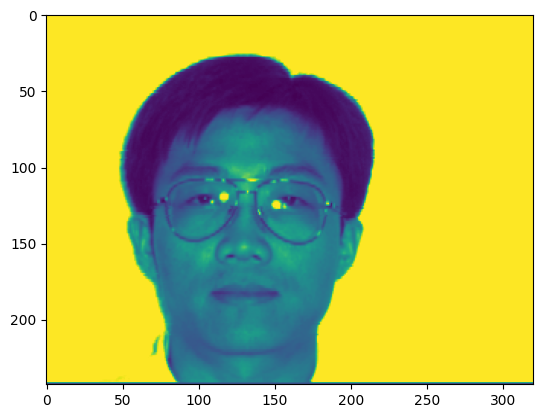

In [16]:
image  = mpl.image.imread("/content/drive/MyDrive/output/cluster_0/subject14.jpg")
plt.imshow(image)

In [22]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1 , min_sampes=5).fit()
cluster = clustering.labels_

TypeError: DBSCAN.__init__() got an unexpected keyword argument 'min_sampes'

In [24]:
from sklearn.cluster import DBSCAN
from skimage import io
from skimage.transform import resize
import numpy as np
import os

image_folder = "/content/drive/MyDrive/dataset"
image_files = os.listdir(image_folder)

# Step 2: Preprocess images and extract features
images = []
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    image = io.imread(image_path)
    # Resize image to a fixed size (optional)
    image = resize(image, (100, 100))
    images.append(image.flatten())  # Flatten image to create feature vector

# Convert list of images to numpy array
data = np.array(images)

# Step 3: Apply DBSCAN
epsilon = 0.5  # Adjust as per your dataset
min_samples = 5  # Adjust as per your dataset
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(data)

# Step 4: Group filenames based on cluster labels
cluster_groups = {}
for label, filename in zip(labels, image_files):
    if label not in cluster_groups:
        cluster_groups[label] = []
    cluster_groups[label].append(filename)

# Step 5: Print filenames for each cluster
for label, filenames in cluster_groups.items():
    print(f"Cluster {label}: {filenames}")


ValueError: ImageIO does not generally support reading folders. Limited support may be available via specific plugins. Specify the plugin explicitly using the `plugin` kwarg, e.g. `plugin='DICOM'`

In [20]:
import shutil
import os

# Create a folder to save the images
output_folder = "/content/drive/MyDrive/output-DB"
os.makedirs(output_folder, exist_ok=True)

cluster_groups = {}
for file, cluster in zip(image_files, labels):  # Assuming image_files and labels are defined
    if cluster not in groups.keys():
        groups[cluster] = []
    groups[cluster].append(file)

# Save the images
for cluster_id, images in groups.items():
    cluster_folder = os.path.join(output_folder, f"cluster_{cluster_id}")
    os.makedirs(cluster_folder, exist_ok=True)
    for image_file in images:
        shutil.copy(os.path.join(image_folder, image_file), cluster_folder)

print("Images saved successfully.")


Images saved successfully.


In [25]:
import shutil
import os
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from skimage import io
from skimage.transform import resize

# Load images
image_folder = "/content/drive/MyDrive/dataset"
image_files = os.listdir(image_folder)

# Preprocess images and extract features
images = []
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    image = io.imread(image_path)
    # Resize image to a fixed size (optional)
    image = resize(image, (100, 100))
    images.append(image.flatten())  # Flatten image to create feature vector

# Convert list of images to numpy array
data = np.array(images)

# Apply Agglomerative clustering
n_clusters = 11  # Adjust as per your requirement
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
labels = agglomerative.fit_predict(data)

# Create a folder to save the images
output_folder = "/content/drive/MyDrive/output-Agglomarative"
os.makedirs(output_folder, exist_ok=True)

# Group filenames based on cluster labels
cluster_groups = {}
for label, filename in zip(labels, image_files):
    if label not in cluster_groups:
        cluster_groups[label] = []
    cluster_groups[label].append(filename)

# Save the images
for cluster_id, images in cluster_groups.items():
    cluster_folder = os.path.join(output_folder, f"cluster_{cluster_id}")
    os.makedirs(cluster_folder, exist_ok=True)
    for image_file in images:
        shutil.copy(os.path.join(image_folder, image_file), cluster_folder)

print("Images saved successfully.")


ValueError: ImageIO does not generally support reading folders. Limited support may be available via specific plugins. Specify the plugin explicitly using the `plugin` kwarg, e.g. `plugin='DICOM'`

In [27]:
import shutil
import os
from sklearn.cluster import DBSCAN
from skimage import io
from skimage.transform import resize
from sklearn.metrics import accuracy_score
from collections import defaultdict

# Load images
image_folder = "/content/drive/MyDrive/dataset/New folder/dataset"
image_files = os.listdir(image_folder)

# Preprocess filenames to extract labels
labels = [filename.split('.')[1] for filename in image_files]

# Preprocess images and extract features
images = []
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    image = io.imread(image_path)
    # Resize image to a fixed size (optional)
    image = resize(image, (100, 100))
    images.append(image.flatten())  # Flatten image to create feature vector

# Convert list of images to numpy array
data = np.array(images)

# Apply DBSCAN
epsilon = 0.5  # Adjust as per your dataset
min_samples = 5  # Adjust as per your dataset
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(data)

# Evaluate accuracy
# Mapping cluster labels to actual labels based on majority vote
label_mapping = defaultdict(lambda: defaultdict(int))
for cluster_label, true_label in zip(cluster_labels, labels):
    label_mapping[cluster_label][true_label] += 1

# Assign the majority true label to each cluster
predicted_labels = [max(label_mapping[cluster_label], key=label_mapping[cluster_label].get) for cluster_label in cluster_labels]

# Calculate accuracy
accuracy = accuracy_score(labels, predicted_labels)

print(f"Accuracy: {accuracy}")


Accuracy: 0.09090909090909091


In [28]:
import shutil
import os
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from skimage import io
from skimage.transform import resize
from sklearn.metrics import accuracy_score
from collections import defaultdict

# Load images
image_folder = "/content/drive/MyDrive/dataset/New folder/dataset"
image_files = os.listdir(image_folder)

# Preprocess filenames to extract labels
labels = [filename.split('.')[1] for filename in image_files]

# Preprocess images and extract features
images = []
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    image = io.imread(image_path)
    # Resize image to a fixed size (optional)
    image = resize(image, (100, 100))
    images.append(image.flatten())  # Flatten image to create feature vector

# Convert list of images to numpy array
data = np.array(images)

# Apply Agglomerative Clustering
n_clusters = 5  # Adjust as per your requirement
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agglomerative.fit_predict(data)

# Evaluate accuracy
# Mapping cluster labels to actual labels based on majority vote
label_mapping = defaultdict(lambda: defaultdict(int))
for cluster_label, true_label in zip(cluster_labels, labels):
    label_mapping[cluster_label][true_label] += 1

# Assign the majority true label to each cluster
predicted_labels = [max(label_mapping[cluster_label], key=label_mapping[cluster_label].get) for cluster_label in cluster_labels]

# Calculate accuracy
accuracy = accuracy_score(labels, predicted_labels)

print(f"Accuracy: {accuracy}")


Accuracy: 0.23636363636363636


In [30]:
import shutil
import os
import numpy as np
from sklearn.cluster import KMeans
from skimage import io
from skimage.transform import resize
from sklearn.metrics import accuracy_score
from collections import defaultdict

# Load images
image_folder = "/content/drive/MyDrive/dataset/New folder/dataset"
image_files = os.listdir(image_folder)

# Preprocess filenames to extract labels
labels = [filename.split('.')[1] for filename in image_files]

# Preprocess images and extract features
images = []
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    image = io.imread(image_path)
    # Resize image to a fixed size (optional)
    image = resize(image, (100, 100))
    images.append(image.flatten())  # Flatten image to create feature vector

# Convert list of images to numpy array
data = np.array(images)

# Apply K-means Clustering
n_clusters = 5  # Adjust as per your requirement
kmeans = KMeans(n_clusters=n_clusters)
cluster_labels = kmeans.fit_predict(data)

# Evaluate accuracy
# Mapping cluster labels to actual labels based on majority vote
label_mapping = defaultdict(lambda: defaultdict(int))
for cluster_label, true_label in zip(cluster_labels, labels):
    label_mapping[cluster_label][true_label] += 1

# Assign the majority true label to each cluster
predicted_labels = [max(label_mapping[cluster_label], key=label_mapping[cluster_label].get) for cluster_label in cluster_labels]

# Calculate accuracy
accuracy = accuracy_score(labels, predicted_labels)

print(f"Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.24848484848484848


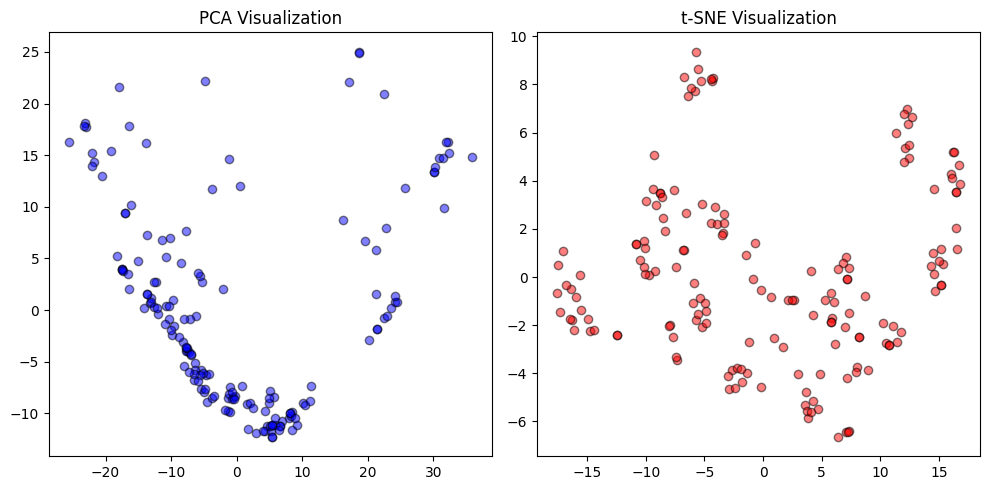

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from skimage import io
from skimage.transform import resize
import os

# Load images
image_folder = "/content/drive/MyDrive/dataset/New folder/dataset"
image_files = os.listdir(image_folder)

# Preprocess images and extract features
images = []
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    image = io.imread(image_path)
    # Resize image to a fixed size (optional)
    image = resize(image, (100, 100))
    images.append(image.flatten())  # Flatten image to create feature vector

# Convert list of images to numpy array
data = np.array(images)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(data)

# Plot PCA result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='b', edgecolor='k', alpha=0.5)
plt.title('PCA Visualization')

# Plot t-SNE result
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='r', edgecolor='k', alpha=0.5)
plt.title('t-SNE Visualization')

plt.tight_layout()
plt.show()
